In [1]:
import sys
sys.path.insert(0, '../python')
import cool_tigress as ct

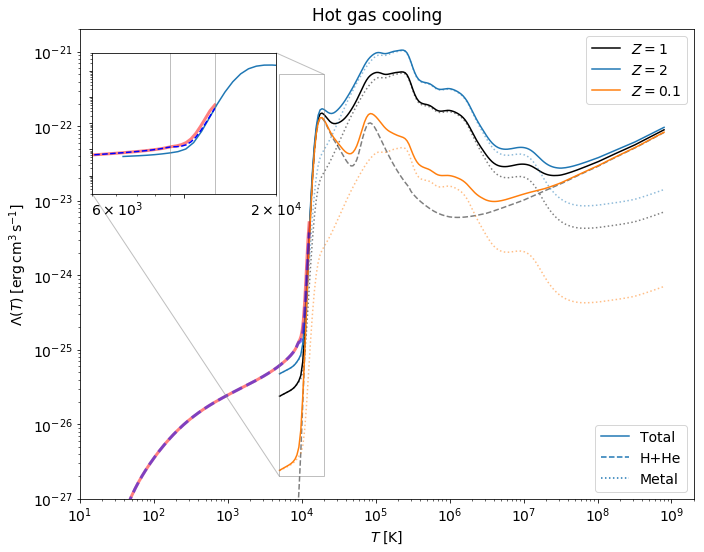

In [13]:
mpl.rcParams['font.size'] = 14
fig, axes = plt.subplots(1, 1, figsize=(11, 8))
T = np.logspace(3.7, 8.9, num=200)
Z = 1.0
c = 'k'
l1, = plt.loglog(T, ct.coolingHot(T, Z), c=c, label=r'$Z=${0:.1g}'.format(Z))
plt.loglog(T, ct.coolingHotHHe(T), c=c, alpha=0.5, ls='--')
plt.loglog(T, ct.coolingHotMetal(T, Z), c=c, alpha=0.5, ls=':')

Z = 2.0
c = 'C0'
l2, = plt.loglog(T, ct.coolingHot(T, Z), c=c, label=r'$Z=${0:.1g}'.format(Z))
#plt.loglog(T, ct.coolingHotHHe(T), c=c, alpha=0.5, ls='--')
plt.loglog(T, ct.coolingHotMetal(T, Z), c=c, alpha=0.5, ls=':')

Z = 0.1
c = 'C1'
l3, = plt.loglog(T, ct.coolingHot(T, Z), c=c, label=r'$Z=${0:.1g}'.format(Z))
#plt.loglog(T, ct.coolingHotHHe(T), c=c, alpha=0.5, ls='--')
plt.loglog(T, ct.coolingHotMetal(T, Z), c=c, alpha=0.5, ls=':')

## Oplot warm gas cooling
Tmin = 10.0
Tmax = 10.0**4.1
Z = 2.0 # Set this parameter to either 0.1, 1.0, or 2.0
T = np.logspace(np.log10(Tmin), np.log10(Tmax), num=200)
par = dict(T=T, Z=Z, xi_CR=2e-16,
           G_PE=1.0, G_CI=1.0, G_CO=1.0, G_H2=1.0,
           x_e_init=0.03, equil=True, maxiter=200, fast_flag=False)
c = ct.CoolTigress(**par)
c.nH[np.where(np.isnan(c.nH))] = 1e-3
c.Lambda = c.get_cooling()
L = (c.get_coolingOI() + c.get_coolingCII() + c.get_coolingCI() + \
     c.get_coolingCO() + c.get_coolingRec() + c.get_coolingLya())/c.nH
plt.loglog(c.T, L, 'r-', alpha=0.5, lw=3)
plt.loglog(c.T, c.Lambda, 'b--', alpha=0.5, lw=3)

# inset axes....
inset = True
if inset:
    T = np.logspace(3.8, 8.9, num=200)
    axin = axes.inset_axes([0.02, 0.65, 0.3, 0.3])
    axin.plot(c.T, L, 'r-', alpha=0.5, lw=3)
    if Z == 0.1:
        color = 'C1'
    elif Z == 1.0:
        color = 'k'
    elif Z == 2.0:
        color = 'C0'
    axin.plot(T, ct.coolingHot(T, Z), c=color)
    axin.plot(c.T, c.Lambda, 'b--')
    axin.set_xscale('log')
    axin.set_yscale('log')
    x1, x2, y1, y2 = 5e3, 2e4, 2e-27, 5e-22
    axin.set_xlim(x1, x2)
    axin.set_ylim(y1, y2)
    axin.set_xticklabels('')
    axin.set_yticklabels('')
    axin.axvline(9000.0, 0, 1, c='grey', lw=0.5)
    axin.axvline(10.0**4.1, 0, 1, c='grey', lw=0.5)
    axes.indicate_inset_zoom(axin, label='_nolabel_')
    
leg = plt.legend([mpl.lines.Line2D([0],[0],ls='-'),
                  mpl.lines.Line2D([0],[0],ls='--'),
                  mpl.lines.Line2D([0],[0],ls=':')],
                 ['Total', 'H+He', 'Metal'], loc=4)

plt.legend()
axes.add_artist(leg)

plt.xlim(1e1, 2e9)
plt.ylim(1e-27, 2e-21)
plt.xlabel(r'$T\;[{\rm K}]$')
plt.ylabel(r'$\Lambda(T)\;[{\rm erg}\,{\rm cm}^3\,{\rm s}^{-1}]$')
plt.suptitle('Hot gas cooling')
plt.subplots_adjust(top=0.94)
plt.savefig('../figure/cooling_hot_Z{0:.1g}.png'.format(Z))

In [82]:
c.nH[np.where(np.isnan(c.nH))] = 1e-3

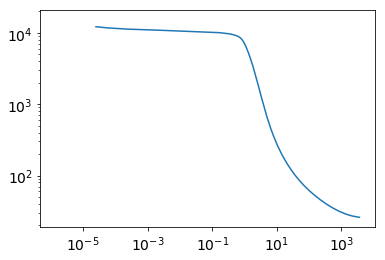

In [64]:
plt.loglog(c.nH,c.T)

In [ ]:
import KI02
cf = KI02.coolftn()
mu=cf.temp/cf.T1
G0 = 1.0
heat1 = cf.heat[0]*((mu - mu.min())/(mu.max() - mu.min()))*(G0 + 0.0024)
#den = heat1/cf.cool
nH_ = cf.heat/cf.cool
muH = 1.4271
axes[0].loglog(nH_, muH*cf.T1*nH_, c='grey', lw=2, alpha=0.5, label='KI02')    
